<a href="https://colab.research.google.com/github/MatheusOrange211/Bootcamp-Alura/blob/main/Bootcamp_Alura_Data_Science_IBGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANALISANDO DADOS DO PenSE- IBGE

>estudando **ESTATÍSTICA** e usando a **Pesquisa Nacional de Saúde do Escolar** de **2015** disponível no site do [IBGE](https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=pense/2015/microdados/)<br>

Autor: Matheus Naranjo Corrêa

* [Linkedln](https://www.linkedin.com/in/matheus-naranjo-35ab22188/)
* [Github](https://github.com/MatheusOrange211)



**O que é o PenSE 2015** ?
>Investiga informações que permitem conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescentes. A pesquisa é realizada por amostragem, utilizando como referência para seleção o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP.  
<br>
A Pesquisa Nacional de Saúde do Escolar - PeNSE teve início em 2009, fruto de parceria com o Ministério da Saúde e apoio do Ministério da Educação. Na primeira edição, os escolares do 9o ano do ensino fundamental (antiga 8a série) das escolas públicas e privadas dos Municípios das Capitais constituíram sua população-alvo. A escolha do 9o ano do ensino fundamental, cabe destacar, teve como justificativa o mínimo da escolarização necessária para responder questionário autoaplicável e também a proximidade da idade de referência preconizada pela Organização Mundial da Saúde - OMS (World Health Organization - WHO), que é de 13 a 15 anos.<br>
Em 2012, embora mantida sua população-alvo, a PeNSE passou a abarcar dados para o conjunto do País e as Grandes Regiões, e a investigar, também, algumas características do ambiente escolar e do entorno. Na edição de 2015, importantes inovações foram introduzidas na pesquisa, dentre as quais se destaca a disponibilização de informações oriundas de dois planos amostrais distintos: escolares frequentando o 9o ano do ensino fundamental e escolares de 13 a 17 anos de idade frequentando as etapas do 6o ao 9o ano do ensino fundamental (antigas 5a a 8a séries) e da 1a a 3a série do ensino médio.
<br>Mais informações, clique [aqui](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e)

# MODULO 4 📙
---
**ANÁLISE DESCRITIVA E TESTES ESTATÍSTICOS**

## AULA 1 : Educação, Saúde e Tipo de dados
---


> Importando bibliotecas e dados

In [1]:
import pandas as pd
from zipfile import ZipFile #usaremos esta lib para descompactar arquivos

diferente dos outros módulos onde a gente puxava os arquivos diretamente do nosso github ou mesmo diretamente de um arquivo csv, aqui, por conta do tamanho do nosso arquivo que é maior que o limite de commits permitido pelo github(25 Mb), teremos que fazer o upload para nosso google drive, depois, iremos criar uma conexão do nosso Drive com o nosso Colab. Feito isso, copiamos o caminho. Agora, temos outro desafio: nosso arquivo está zipado, o que significa que um simples read_csv() não funcionará. Precisamos então descompactar ele com o zipfile.

In [2]:
caminho = '/content/drive/MyDrive/bootcamp-modulo3/PeNSE_2015_AMOSTRA2.zip'
zip = ZipFile(caminho)

Precisamos então, antes de descompactar, saber o que temos no nosso .zip, afinal, com o que trabalharemos? que dados há ali dentro? que tipos de extensões? vamos então usar **ZipFile.namelist()** para descobrir isso!

In [3]:
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

Nos é retornada uma lista de arquivos dos quais temos a nossa disposição. Agora, podemos finalmente usar o read_csv do pandas. Como temos uma lista aí, podemos pegar o elemento de indice [1] ou [2] e por ai vai.

In [4]:
caminho_pasta_zipada = zip.namelist()[1]

#zip.open abrirá o caminho, que está na variavel, que contem o nome do arquivo e a extensão, que será lido pelo pandas.
#passamos então nosso separador, footer e outras coisas que sejam necessárias para leitura completa
dados = pd.read_csv(zip.open(caminho_pasta_zipada),sep=';',thousands='.',decimal=',') 
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


vejamos os tipos de dados que nós temos em nosso dataset

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


vamos ver mais de perto essas 3 colunas reconhecidas como `object`
**Nota**: Originalmente, tinhamos 3 colunas do tipo `objects`, contudo, adicionando o `thousands` e `decimal` para converter os valores para o padrão americano, essas infos são modificadas para float.

In [6]:
# dados.select_dtypes(include='object')

### AULA 01 - DESAFIO 01
> Descompactar a pasta zipada usando outro método (Dica Allan, é utilizar comandos Bash)

In [7]:
!ls /content/drive/MyDrive/bootcamp-modulo3  #me retorna o arquivo dentro do diretório que está zipado
! unzip /content/drive/MyDrive/bootcamp-modulo3/PeNSE_2015_AMOSTRA2.zip  #descompacta o arquivo

PeNSE_2015_AMOSTRA2.zip
Archive:  /content/drive/MyDrive/bootcamp-modulo3/PeNSE_2015_AMOSTRA2.zip
   creating: arquivos csv/
  inflating: arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV  
  inflating: arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV  
  inflating: arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV  
   creating: arquivos sas/
  inflating: arquivos sas/pense_amostra2_aluno.sas7bdat  
  inflating: arquivos sas/pense_amostra2_alunoescola.sas7bdat  
  inflating: arquivos sas/pense_amostra2_escola.sas7bdat  
   creating: arquivos xlsx/
  inflating: arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx  
  inflating: arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx  
  inflating: arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx  
  inflating: Dicionario_PENSE_Microdados_AMOSTRA2.xls  


In [8]:
!ls arquivos\ csv #o contrabarra veio por conta do espaço (?), alem disso !ls lista  o conteudo de dentro do diretório 'arquivos csv'

PENSE_AMOSTRA2_ALUNO.CSV	PENSE_AMOSTRA2_ESCOLA.CSV
PENSE_AMOSTRA2_ALUNOESCOLA.CSV


In [9]:
pd.read_csv('arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',sep=';') #passo o caminho e o nome do arquivo que desejo ler!

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,"37,1",157,2,1,1223,1,"299,735235",1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,"50,2",152,2,2,1223,1,"355,170081",1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,"48,2","161,4",2,2,1223,1,"299,735235",1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,"69,4","172,5",2,3,1223,1,"355,170081",1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,"78,9","167,5",2,4,1223,1,"299,735235",1,2,4,1,5,1,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2015,76,5,1,2,4,12,8,8,1,1,7,5,2,-1,1,1,1,1,1,1,3,1,3,1,2,2,6,3,8,7,5,8,7,5,1,2,1,-1,2,...,2,1,1,1,1,4,1,2,1,1,1,7,1,1,2,2,2,2,2,2,1,2,2,2,567.0,1679.0,"56,7","167,9",2,2,521,5,"447,815539",1,2,4,1,16552,371,117
16552,2015,76,5,1,1,1,15,7,5,1,1,7,4,2,-1,2,1,1,1,1,1,3,1,3,1,1,2,5,4,6,2,4,1,6,1,1,6,4,-1,2,...,2,1,2,1,1,4,1,2,1,2,5,12,1,-1,2,2,1,2,2,2,2,2,2,2,619.0,1858.0,"61,9","185,8",2,2,521,5,"592,50744",1,2,4,1,16553,371,117
16553,2015,76,5,1,1,4,13,11,7,1,1,7,4,2,-1,1,2,1,1,1,2,3,1,3,1,2,2,5,4,8,1,8,2,8,1,1,5,5,-1,2,...,2,4,1,5,5,4,1,7,3,1,5,-1,1,-1,2,2,2,2,2,2,1,2,2,2,609.0,1594.0,"60,9","159,4",2,3,521,5,"401,131512",1,2,4,1,16554,371,117
16554,2015,76,5,1,1,4,14,8,6,1,1,7,4,2,-1,1,1,1,1,1,1,3,2,3,1,1,2,5,3,7,5,6,4,8,7,3,1,5,-1,2,...,2,3,2,3,4,4,2,-1,1,1,2,7,1,-1,1,1,2,2,2,2,1,2,2,2,473.0,1578.0,"47,3","157,8",2,2,521,5,"442,718091",1,2,4,1,16555,371,117


### AULA 01 - DESAFIO 02 
> Estudar sobre a base de dados que vamos trabalhar. (PeNSE - 2015 Amostra 2)

Temos algumas informações interessantes nos seguintes links que nos ajudarão a entender melhor o funcionamento não só do dataset mas também do próprio PenSE 2015:

* [O que é?](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e)
* [Vídeo explicando o PenSE 2015](https://www.youtube.com/watch?v=z4BBCHZUvD4)


###AULA 01 - DESAFIO 03
> Classificar algumas perguntas como QualitativaXQuantitativa

In [10]:
%%html
<img src='https://i.ytimg.com/vi/1zy6DTHQDzM/maxresdefault.jpg' width='800px' heigth='800px'/>

**QUALITATIVAS**
é um tipo de método de investigação de base linguístico-semiótica usada principalmente em ciências sociais.

**QUALITATIVAS NOMINAL** 
não existe ordenação dentre as *categorias*

In [11]:
dados[['REGEOGR','VB01001','VB01002','VB04009','VB04003','VB04002','VB11001']]

,REGEOGR,VB01001,VB01002,VB04009,VB04003,VB04002,VB11001
0,1,2,1,-1,-1,-1,1
1,1,2,1,-1,-1,-1,3
2,1,1,4,-1,-1,-1,3
3,1,1,1,-1,-1,-1,3
4,1,1,1,-1,-1,-1,4
...,...,...,...,...,...,...,...
16551,5,2,4,-1,-1,-1,3
16552,5,1,1,-1,-1,-1,2
16553,5,1,4,-1,-1,-1,3
16554,5,1,4,-1,-1,-1,2


**QUALITATIVAS ORDINAL** 
existe ordenação dentre as *categorias*

In [12]:
dados[['VB01003','VB01004','VB01005','VB01021','VB01022','VB03011A','VB03007']]

,VB01003,VB01004,VB01005,VB01021,VB01022,VB03011A,VB03007
0,13,7,7,4,1,2,1
1,14,4,7,4,1,6,7
2,13,6,7,4,1,8,7
3,14,6,7,4,1,1,-1
4,13,9,7,4,1,2,5
...,...,...,...,...,...,...,...
16551,12,8,8,3,1,5,7
16552,15,7,5,3,1,5,7
16553,13,11,7,3,1,2,-1
16554,14,8,6,3,1,3,4


**QUANTITATIVAS**
>é a pesquisa científica na qual os resultados podem ser quantificados, diferindo da pesquisa qualitativa. A pesquisa quantitativa recorre a linguagem matemática para descrever as causas de um fenômeno, relações entre variáveis, entre outras aplicações.

**DISCRETAS**  quando o conjunto de resultados possíveis é finito ou enumerável. Exemplo: número de filhos, alunos numa escola etc. Contínuas: quando os valores são expressos como intervalo ou união de números reais.

In [13]:
dados[['VB01003','VB01005','VB01010A']]

,VB01003,VB01005,VB01010A
0,13,7,3
1,14,7,3
2,13,7,5
3,14,7,4
4,13,7,4
...,...,...,...
16551,12,8,5
16552,15,5,4
16553,13,7,4
16554,14,6,4


**CONTÍNUA** quando os valores são expressos como intervalo ou união de números reais.

In [14]:
dados[['VB01003','VB01005','VB01010A','PESO']]

,VB01003,VB01005,VB01010A,PESO
0,13,7,3,299.735235
1,14,7,3,355.170081
2,13,7,5,299.735235
3,14,7,4,355.170081
4,13,7,4,299.735235
...,...,...,...,...
16551,12,8,5,447.815539
16552,15,5,4,592.507440
16553,13,7,4,401.131512
16554,14,6,4,442.718091


##AULA 2 : Dados Qualitativos e Tabelas de Frequências
---

Vamos fazer uma tabela de frequência. Ver quantas vezes, determinadas perguntas foram respondidas. Qual a frequencia de alunos que responderam 'a','b','c' e por ai vai...

In [15]:
#pergunta relacionada
dados['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

temos então a frequencia das nossas respostas. Essa pergunta se refere ao sexo dos estudantes (1 - Masculino, 2- Feminino). Os dados são quase iguais. Usemos então o  `normalize`igual a `True` para converter as porcentagens

In [16]:
dados['VB01001'].value_counts(normalize=True) *100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

Legal! Sabemos então que a pesquisa foi bem distribuída entre os estudantes. Maaaas, lembre-se, essa distribuição aí foi proposital. O que o PenSE quer é não entrar em nenhum viés de confirmação, logo é proposital que a distribuição seja bem feita. Contudo, quanto as respostas dos estudantes para questões como  *Você está satisfeito com o seu corpo?*, a pesquisa não possui controle e é isso que iremos ver melhor agora.<br>
No dicionário de dados temos que cada valor corresponde a:

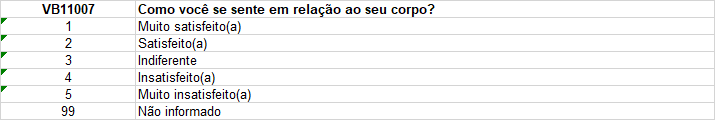
<br> Temos dados qualitativos nominal (pois temos uma ordem de preferencia: satisfeito, muito satisfeito...)

In [17]:
frequencia = dados['VB11007'].value_counts()
frequencia

2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: VB11007, dtype: int64

In [18]:
percentual = dados['VB11007'].value_counts(normalize=True) * 100
percentual

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: VB11007, dtype: float64

Montamos por fim, uma estrura de DataFrame para entender melhor essas informações. Passamos uma estrutura de dicionário onde a key são o nome das colunas e os values as Series

In [19]:
respostas = {
    1: 'Muito Satisfeito (a)',
    2: 'Satisfeito (a)',
    3: 'Indiferente',
    4: 'Insatisfeito (a)',
    5: 'Muito Insatisfeito (a)',
    99: 'Não Informado'
}

dist_freq = pd.DataFrame({"frequencia":frequencia,"percentual":percentual})
dist_freq.rename(index = respostas, inplace = True) #substituindo os valores pelos nomes
dist_freq.rename_axis("Como você se sente em relação ao seu corpo?",axis=1,inplace=True) #dando um nome para o nosso index
dist_freq

Como você se sente em relação ao seu corpo?,frequencia,percentual
Satisfeito (a),6920,41.797536
Muito Satisfeito (a),4608,27.832810
Insatisfeito (a),2326,14.049287
Indiferente,1807,10.914472
Muito Insatisfeito (a),714,4.312636
Não Informado,181,1.093259


###AULA 02 - DESAFIO 01 <br>
>Criar uma função para gerar as tabelas de frequência e fazer a análise de outras informações. Compartilhar no discord suas análises

In [20]:
def tab_freq(dataset : pd.DataFrame, dicionario : dict = None, titulo_index : str = None):
  frequencia = dataset.value_counts()
  percentual = dataset.value_counts(normalize=True) *100
  dataset_final = pd.DataFrame({"Frequencia": frequencia, "Percentual": percentual})

  if dicionario:
    dataset_final.rename(index=dicionario, inplace =True)
  
  if titulo_index:
    dataset_final.rename_axis(titulo_index,axis=1,inplace=True)
  return dataset_final

In [21]:
respostas1 = {
    1: 'Muito Importante',
    2: 'Importante',
    3: 'Pouco Importante',
    4: 'Sem Importância',
    99: 'Não Informado'
}
teste1 = tab_freq(dados["VB11006"],respostas1,"Você considera sua imagem corporal como sendo algo")
teste1

Você considera sua imagem corporal como sendo algo,Frequencia,Percentual
Muito Importante,7102,42.896835
Importante,6604,39.888862
Pouco Importante,1969,11.892969
Sem Importância,726,4.385117
Não Informado,155,0.936216


In [24]:
respostas2 = {
    -1: "Pulo no questionário",
    1: "Apoio para controle de peso (ganhar ou perder)",
    2: "Apoio para parar de fumar",
    3: "Acidente ou lesão",
    4: "Reabilitação ou terapia",
    5: "Doença",
    6: "Problema odontológico",
    7: "Vacinação",
    8: "Consulta para métodos contraceptivos (preservativos, pílula, DIU etc)",
    9: "Buscar contracepção de emergência (pílula do dia seguinte)",
    10: "Teste para HIV, Sífilis ou Hepatite B",
    11:"Pré-natal / Teste para gravidez",
    12: "Solicitação de atestado médico",
    13: "Outro",
    99: 'Não Informado'
}
tab_freq(dados["VB13007"],respostas2,"Qual foi o PRINCIPAL MOTIVO da sua procura na UBS")

Qual foi o PRINCIPAL MOTIVO da sua procura na UBS,Frequencia,Percentual
Pulo no questionário,5526,33.377627
Doença,2642,15.957961
Apoio para controle de peso (ganhar ou perder),2171,13.113071
Vacinação,2018,12.188935
Outro,1994,12.043972
Acidente ou lesão,680,4.107272
Problema odontológico,444,2.681807
Solicitação de atestado médico,296,1.787871
Não Informado,235,1.419425
"Consulta para métodos contraceptivos (preservativos, pílula, DIU etc)",168,1.014738


##AULA 03 - Frequência em Dados Contínuos e Pandas Crosstab
---

Continuando nossas análises, vamos ver uma coluna que trata das alturas dos alunos. Esse tipo de informação não contém, diferente de outros casos, uma "classificação". E agora ? que coisas podemos fazer?

In [25]:
dados['VB17004']

0        157.0
1        152.0
2        161.4
3        172.5
4        167.5
         ...  
16551    167.9
16552    185.8
16553    159.4
16554    157.8
16555    163.9
Name: VB17004, Length: 16556, dtype: float64

Vamos calcular o IMC? não temos muito o que fazer só com a altura, mas analisando o peso por exemplo, podemos calcular o imc, cuja fórmula é:

\begin{equation}
IMC =\dfrac{PESO}{ALTURA ^2}
\end{equation}
<br>
Lembrando que no IMC, calculamos a altura em metros. Nossa coluna está em centrímetros, logo, dividiremos por 100.

In [26]:
dados['IMC'] = dados['VB17003'] / ((dados['VB17004'] / 100) **2)
dados['IMC']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

Muito bom! mas sabe o que seria melhor? se nós tivéssemos como por a qual grupo cada um dos valores pertence no imc. Com o pd.cut(), nós vamos conseguir isso! Observe a explicação do que ele faz:

> Use o cut quando você deseja  segmentar e ordenar os valores dos dados de acordo com o `bins`. Essa função também é usada para ir de uma variável contínua para uma variável categórica. Por exemplo, por meio do **cut**, podemos converter idades em faixa etárias 👶 👧 👩 👩‍🦳 👵.<br>
Abaixo, um esquema para relembrar os tipos de dados

<img src="https://static.docsity.com/documents_pages/notas/2012/11/22/2672b74e300a6c8138c474faf4be55f1.png"  width='400px' heigth='400px'>

In [28]:
classes =[0,18.5,25,30,60]
labels=["abaixo","normal","sobrepeso","obesidade"]

dados['CLASSE_IMC'] = pd.cut(x=dados['IMC'],
       bins =classes,
       labels=labels,
       include_lowest=True) #esse aqui funciona da seguinte forma: inclui o intervalo mais baixo como fechado, e o mais alto como aberto

In [29]:
dados[['IMC','CLASSE_IMC']]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


Com a função criada no desafio anterior, podemos ver a frequencia e o percentual

In [32]:
tab_freq(dados['CLASSE_IMC'],None,"IMC FREQUENCIA")

IMC FREQUENCIA,Frequencia,Percentual
normal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


Continuando a aula, temos que

###EXPLICAÇÃO MATEMATICA : REGRA DE STURGES

Esse desafio será corrigido em aula, mas vamos tentar resolver antes da continuação.
<br>
<br>
Pois bem. A chamada **Regra de Sturges** é um critério usado para determinar o número de classes ou intervalos necessários para representar graficamente um conjunto de dados estatísticos. Esta regra foi enunciada em 1926 pelo matemático alemão Herbert Sturges.
<br>
Sturges propôs um método simples, baseado no número de amostras x que permitiria encontrar o número de classes e seu alcance. A regra Sturges é amplamente usada, especialmente na área de estatística, especificamente para criar histogramas de frequência.
<br>Para calcular ela, precisamos passar por algumas etapas. Primeiro temos que calcular o  valor **K** que vai ser o tamanho da nossa amostra ou número de observações:

\begin{equation}
K = 1 + 3,322 \times \log_{10}({N})
\end{equation}
<br>
Nesta expressão:

– k é o número de classes.

– N é o número total de observações na amostra.

– Log é o logaritmo comum da base 10.

**NOTA**: Os resultados de **K** devem ser arredondados para **INTEIRO**

<br>
A regra Sturges é aplicada principalmente em estatística, pois permite que seja feita uma distribuição de frequência através do cálculo do número de classes (k), bem como do comprimento de cada uma delas, também conhecida como amplitude.A amplitude é a diferença do limite superior e inferior da classe, dividida pelo número de classes, e é expressa:

\begin{equation}
Amplitude = \dfrac{{Limite \space Superior }-{Limite \space Inferior}}{K}
\end{equation}



Para calcular os intervalos, teremos que :

\begin{equation}
Limite\space Inferior = Limite \space Superior + 1 
\end{equation}

\begin{equation}
Limite\space Superior = Limite \space Inferior + Amplitude -  1 
\end{equation}
<br> Supondo então que nossa Amplitude = 6 , nosso limite inferior  inicial  = 13, teremos o seguinte intervalo:

\begin{equation}
Limite\space Superior = 13 + 6 -  1 
\end{equation}

\begin{equation}
Limite \space Superior = 18 
\end{equation}

\begin{equation}
\big[...\big]
\end{equation}
<br>
<br>
<img src =" https://maestrovirtuale.com/wp-content/uploads/2019/10/Regla-de-Sturges-2-e1525352158650.jpg"
align="right"> <br>Temos então ao lado uma tabela pra entender melhor o funcionamento. Agora  fica a dúvida de como fazer isso em programação

###AULA 03 - DESAFIO 01
> Criar uma tabela de frequência para o peso seguindo a regra de Sturges.

Com base na resposta [aqui](https://pt.stackoverflow.com/questions/270580/como-fazer-uma-tabela-de-distribui%C3%A7%C3%A3o-de-frequ%C3%AAncia-em-python) temos:
<br>1 - Pegaremos nossa coluna `PESO`

In [103]:
dados['VB17003']

0        37.1
1        50.2
2        48.2
3        69.4
4        78.9
         ... 
16551    56.7
16552    61.9
16553    60.9
16554    47.3
16555    62.6
Name: VB17003, Length: 16556, dtype: float64

Fazemos uma leitura de quantos dados tempos a respeito de peso. No caso, temos 16556 registros de peso

In [151]:
len(dados['VB17003'])

16556

Importamos a biblioteca Math do python, depois aplicamoms a fórmula para calcular K que corresponde ao Intrrvalo da nossa amostra segundo regra de Sturges:
<br>

\begin{equation}
K = 1 + 3,322 \times \log_{10}({N})
\end{equation}

In [176]:
import math 
k = round(1 + 3.322 * math.log10(len(dados['VB17003'])))
k

15

Criamos uma nova coluna e aplicamos o pd.cut():
* Passamos a nossa Series Peso;
* Passamos a variável K, que contem o valor 15. Este valor corresponde ao Bins que aplicaremos nos dados. A cada 15 de números, criamos um intervalo.
* Incluir include_lowest: Se o Primeiro Intervalo deve ser de esquerda ou não.
* Passo minha função para criar a coluna frequencia e porcentagem e adicionar os valores de Peso_Intervalo como meu index.

In [175]:
dados['PESO_INTERVALO'] = pd.cut(x=dados['VB17003'],
                                  bins = k,
                                  include_lowest=True)

tab_freq(dados['PESO_INTERVALO'],None,"Intervalo - PESO")

Intervalo - PESO,Frequencia,Percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


###AULA 03 - DESAFIO 02

##AULA 4
---